In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import spacy

# Read the 'text' column from the CSV file
df = pd.read_csv('reviews.csv', usecols=['text'])


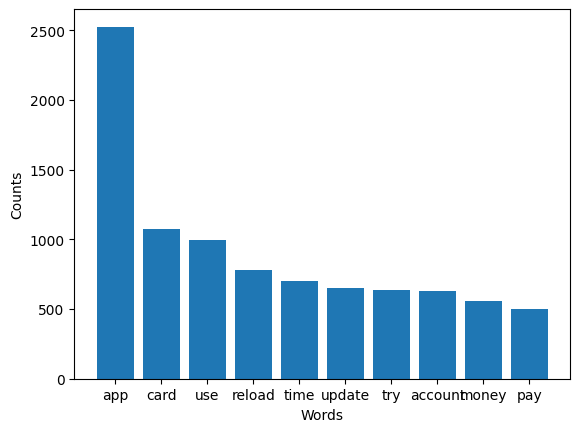

In [14]:
# 加载spaCy的英语模型
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    # Create a Doc object
    
    doc = nlp(text)
    
    # Tokenize, remove stop words and non-alphabetic characters, and lemmatize
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    
    return ' '.join(tokens)

# 对'text'列进行预处理
df['text'] = df['text'].apply(preprocess)

# 将所有的文本连接成一个长字符串
text = ' '.join(df['text'])

# 分词
words = text.split()

# 统计词频
word_counts = Counter(words)

# 找出出现次数最多的10个词
common_words = word_counts.most_common(10)

# 绘制条形图
plt.bar(*zip(*common_words))
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

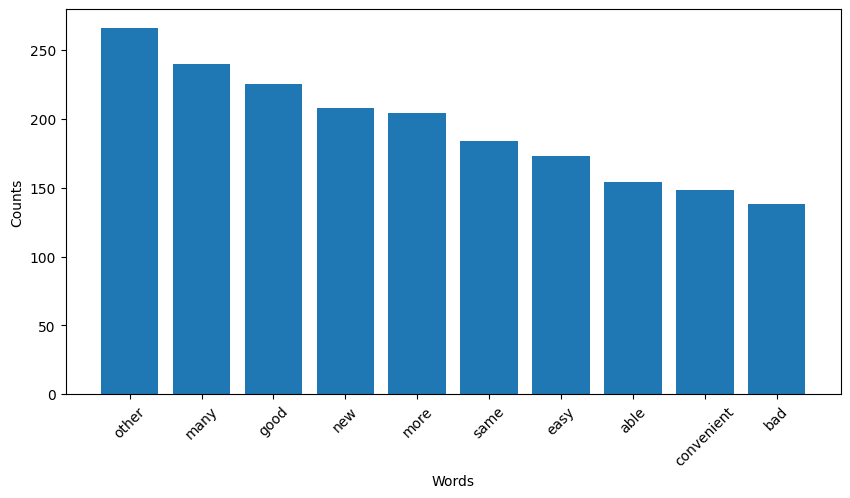

In [17]:
# 加载spaCy的英语模型
nlp = spacy.load('en_core_web_sm')

# 将所有的文本连接成一个长字符串
text = ' '.join(df['text'])

# 创建一个Doc对象
doc = nlp(text)

# 只保留形容词
words = [token.text for token in doc if token.pos_ in ['ADJ']]

# 统计词频
word_counts = Counter(words)

# 找出出现次数最多的10个词
common_words = word_counts.most_common(10)

# 设置图形的大小
plt.figure(figsize=(10, 5))

# 绘制条形图
plt.bar(*zip(*common_words))

# 旋转x轴的标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Words')
plt.ylabel('Counts')

# 显示图形
plt.show()

In [ ]:
# 将处理后的'text'列输出为CSV文件
df['text'].to_csv('processed_text.csv', index=False)